# Jon Oulton
## Preliminary Route Data Analysis

In [1]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
import string
%matplotlib inline

## Import Route Data

Bring in route data as a pandas dataframe

In [2]:
# DEFINE PATH TO ROUTE DATA HERE
filepath = './Data/playData.json'

with open(filepath) as file:
    reader = file.read()
    routesDict = dict(json.loads(reader))
    routes = pd.DataFrame.from_dict(routesDict, orient='index')

In [3]:
# CREATE A LIST OF ALL MP GRADES
with open('./Data/grades.txt') as file:
    reader = file.read()
    grades = []
    tempStr = ""
    for c in reader:
        if c != '\n':
            tempStr = tempStr + c
        else:
            grades.append(tempStr)
            tempStr = ""
    print(grades)

['3rd', '4th', 'Easy 5th', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.7+', '5.8-', '5.8', '5.8+', '5.9-', '5.9', '5.9+', '5.10a', '5.10-', '5.10a/b', '5.10b', '5.10', '5.10b/c', '5.10c', '5.10+', '5.10c/d', '5.10d', '5.11a', '5.11-', '5.11a/b', '5.11b', '5.11', '5.11b/c', '5.11c', '5.11+', '5.11c/d', '5.11d', '5.12a', '5.12-', '5.12a/b', '5.12b', '5.12', '5.12b/c', '5.12c', '5.12+', '5.12c/d', '5.12d', '5.13a', '5.13-', '5.13a/b', '5.13b', '5.13', '5.13b/c', '5.13c', '5.13+', '5.13c/d', '5.13d', '5.14a', '5.14-', '5.14a/b', '5.14b', '5.14', '5.14b/c', '5.14c', '5.14+', '5.14c/d', '5.14d', '5.15a', '5.15-', '5.15a/b', '5.15b', '5.15', '5.15c', '5.15+', '5.15c/d']


## Unpack nested JSON objects

In [4]:
routes['latitude'] = [float(routes["location"][item]['latitude']) for item in range(len(routes["location"]))]
routes['longitude'] = [float(routes['location'][item]['longitude']) for item in range(len(routes))]
routes['diffRating'] = [routes['grade'][item]['rateYDS'] for item in range(len(routes))]
routes['avgQualityRating'] = [float(routes['votes'][item]['avgRating']) for item in range(len(routes))]
routes['numQualityVotes'] = [float(routes['votes'][item]['avgRating']) for item in range(len(routes))]
routes['desc_aggregateData'] = [routes['description'][item]['aggregateData'] for item in range(len(routes))]
routes['trad'] = [routes['description'][item]['trad'] for item in range(len(routes))]
routes['sport'] = [routes['description'][item]['sport'] for item in range(len(routes))]
routes['boulder'] = [routes['description'][item]['boulder'] for item in range(len(routes))]
routes['aid'] = [routes['description'][item]['aid'] for item in range(len(routes))]
routes['ice'] = [routes['description'][item]['ice'] for item in range(len(routes))]
routes['mixed'] = [routes['description'][item]['mixed'] for item in range(len(routes))]
routes['alpine'] = [routes['description'][item]['alpine'] for item in range(len(routes))]
routes['TR'] = [routes['description'][item]['TR'] for item in range(len(routes))]
routes['pageViews'] = [routes['pageData'][item]['totalViews'] for item in range(len(routes))]
routes['viewsPerMonth'] = [routes['pageData'][item]['viewsPerMonth'] for item in range(len(routes))]
routes['submittedOn'] = [routes['pageData'][item]['submittedOn'] for item in range(len(routes))]
routes['submittedBy'] = [routes['pageData'][item]['submittedBy'] for item in range(len(routes))]
routes['votePageUrl'] = [routes['urls'][item]['votePage'] for item in range(len(routes))]

# ADD THE LENGTH AND PITCHES
lengthFt = [routes['length'][item]['feet'] for item in range(len(routes))]
pitches = [routes['length'][item]['pitches'] for item in range(len(routes))]

for item in lengthFt:     # CONVERT TO INTS
    try: item = int(item)
    except: item = None
for item in lengthFt:     # CONVERT TO INTS
    try: item = int(item)
    except: item = None
        
routes['lengthFt'] = lengthFt
routes['pitches'] = pitches

# ADD THE BREADCRUMB TRAILS
breadcrumb = [0] * len(routes)
for item in range(len(routes)):
    routeBreadcrumb = [0, []]
    routeBreadcrumb[0] = len(routes['breadcrumb'][item]['itemListElement'])
    for area in range(len(routes['breadcrumb'][item]['itemListElement'])):
        routeBreadcrumb[1].append([routes['breadcrumb'][item]['itemListElement'][area]['position'],
                                   routes['breadcrumb'][item]['itemListElement'][area]['item']['name'],
                                   routes['breadcrumb'][item]['itemListElement'][area]['item']['@id']])
    breadcrumb[item] = routeBreadcrumb

# DROP THE SUPERFULOUS COLUMNS
routes.drop(columns=['pageType', 'urls', 'location', 'grade', 'votes', 'description', 'length', 'pageData', 'textFields', 'breadcrumb'], inplace=True)


## More Data Munging

In [5]:
def stringToList(s, onlyDigits):
    words = []
    currentWord = ""
    counter = 0
    for c in s:
        if c in string.whitespace or c == ",":
            if onlyDigits:
                if currentWord.isdigit():
                    words.append(currentWord)
            else:
                words.append(currentWord)
            currentWord = ""
            counter += 1
        elif counter == len(s)-1:
            currentWord += c
            if onlyDigits:
                if currentWord.isdigit():
                    words.append(currentWord)
            else:
                words.append(currentWord)
            counter += 1
        else:
            currentWord += c
            counter += 1
    return words

# REMOVE "YDS" FROM DIFFICULTY RATING
diff = []
for item in routes['diffRating']:
    diff.append(item)
    
for item in range(len(diff)):
    try:
        if "YDS" in diff[item]:
            s = stringToList(diff[item], 0)
            s = s[:len(s)-1]
            diff[item] = " ".join(s)
    except TypeError:
        continue
# print(diff)
routes['diffRating'] = diff

## Basic Analytics

In [6]:
print("Total number of routes:", len(routes))
print("Number of trad routes:", len(routes.loc[routes['trad'] == True]))
print("Number of sport routes:", len(routes.loc[routes['sport'] == True]))
print("Percent of routes marked as both sport and trad: {:.2f}".format((len(routes.loc[(routes['trad'] == True) & (routes['sport'] == True)])/len(routes))*100),"%")
set(routes['diffRating'])

trad = routes.loc[(routes['trad'] == True) & (routes['sport'] == False)]['diffRating'].dropna()
sport = routes.loc[(routes['trad'] == False) & (routes['sport'] == True)]['diffRating'].dropna()

Total number of routes: 89432
Number of trad routes: 36359
Number of sport routes: 33080
Percent of routes marked as both sport and trad: 2.22 %


In [18]:
tradDistro = []
for i in grades:
    tradDistro.append(np.sum(trad == i))

sportDistro = []
for i in grades:
    sportDistro.append(np.sum(sport == i))

# CONVERT MULTIPLE GRADES TO SIMPLE GRADES (e.g. 5.10-/5.10a/5.10c => 5.10)
simpleGrades = ['3rd', '4th', 'Easy 5th', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12', '5.13', '5.14', '5.15']
simpleTrad = [0] * len(simpleGrades)
simpleSport = [0] * len(simpleGrades)
for i in range(len(simpleGrades)):
    for j in range(len(grades)):
        if simpleGrades[i] in grades[j] and simpleGrades[i] != '5.1':
            simpleTrad[i] = simpleTrad[i] + tradDistro[j]
            simpleSport[i] = simpleSport[i] + sportDistro[j]
        elif simpleGrades[i] is '5.1' and grades[j] == '5.1':
            simpleTrad[i] = simpleTrad[i] + tradDistro[j]
            simpleSport[i] = simpleSport[i] + sportDistro[j]
            
for i in range(len(simpleGrades)):
    print(simpleGrades[i], simpleTrad[i])

3rd 115
4th 194
Easy 5th 121
5.0 70
5.1 0
5.2 155
5.3 281
5.4 723
5.5 1002
5.6 1977
5.7 3489
5.8 4605
5.9 5320
5.10 8702
5.11 4810
5.12 1722
5.13 255
5.14 24
5.15 0


19
19


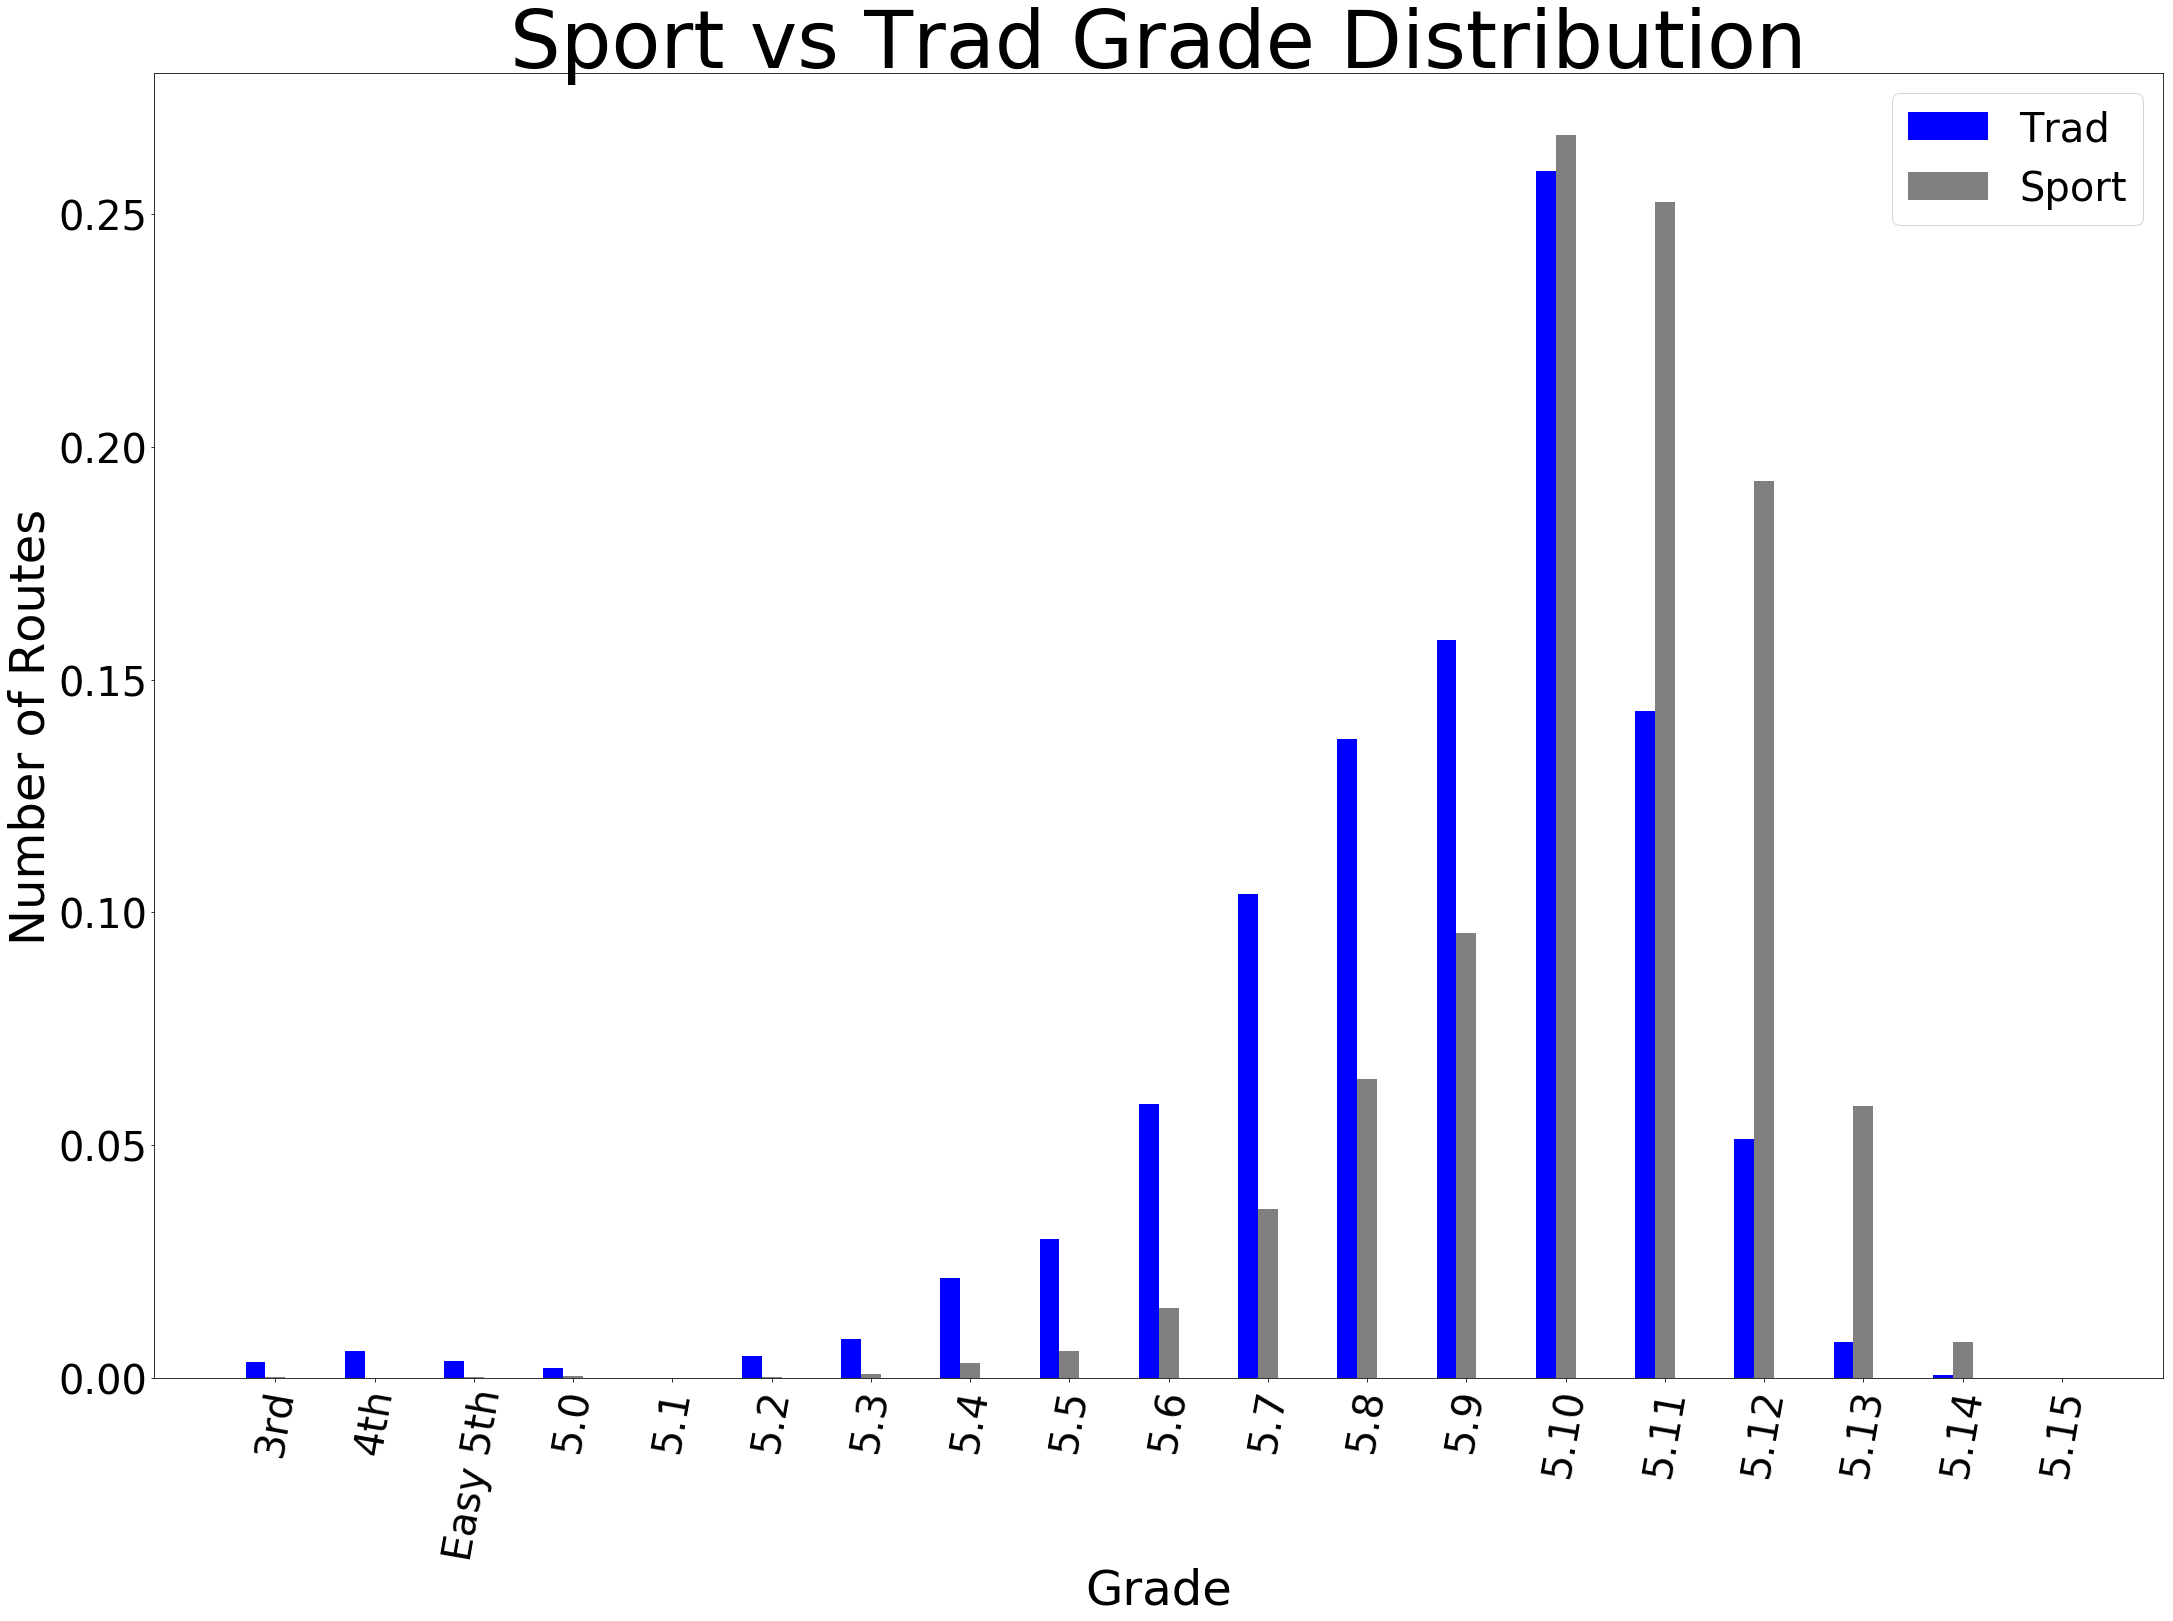

In [25]:
# CHANGE THESE TO ALTER GRAPH (EXPANDED VS COMPRESSED GRADES)
tradBars = simpleTrad   # CHANGE BTW SIMPLETRAD & TRAD DISTRO
sportBars = simpleSport # CHANGE BTW SIMPLESPORT & SPORT DISTRO
labels = simpleGrades   # CHANGE BTW SIMPLEGRADES & GRADES

# NORMALIZE THE DATA
normTrad = []
for i in tradBars:
    normTrad.append(i/np.sum(tradBars))
normSport = []
for i in sportBars:
    normSport.append(i/np.sum(sportBars))
    
print(len(normTrad))
print(len(labels))
    
# PLOT THE FIGURE
fig, ax = plt.subplots(figsize=(36,24))
ind = np.arange(len(labels))
width = 0.2
ax.bar(ind-(width/2), normTrad, width=width, tick_label=labels, color='blue')
ax.bar(ind+(width/2), normSport, width=width, tick_label=labels, color='grey')
ax.set_xlabel("Grade", fontsize=48)
ax.set_ylabel("Number of Routes", fontsize=48)
ax.set_title("Sport vs Trad Grade Distribution", fontsize=80)
ax.tick_params(axis='x', labelrotation=80, labelsize=40)
ax.tick_params(axis='y', labelsize=40)
ax.legend(["Trad", "Sport"], fontsize=40)

fig.savefig('Figures/sportVsTrad.png')

plt.show()

33565